# Converting Ultrasonic Array Data to Image Data

> This notebook explores the given ultrasonic data and implements a function to convert the ultrasonic array data into image data

---

# 1. Importing Libraries

In [1]:
# general libraries
import numpy as np
import pandas as pd 

# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# statistic and general libraries
import scipy.io
from os import path
from pathlib import Path
import os.path
from PIL import Image

# warnings
from warnings import filterwarnings
filterwarnings('ignore')

---

# 2. Data : 2.5MHz

In [2]:
# loading the data
f1 = scipy.io.loadmat("C:\\Users\\revon\\OneDrive - University of Bristol\\summer project\\july_read_data\\Sm_2_5MHz.mat")

In [3]:
type(f1) # checking the data type of the provided data

dict

In [4]:
len(f1) 

8

In [5]:
f1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'angle_a', 'phi1', 'phi2', 'sc_2_5mhz', 'size_ha'])

- angle_a: angle, θ = [-30°:2°:30°]
- phi1: wave incident angles, α [-90°,90°]
- phi2: wave scattering angles, β [-90°,90°]
- sc_5mhz: [defect angle, defect size, wave incident angles, wave scattered angles], 31 x 46 x 179 x 91
- size_ha: defect size, l, [0.5:0.1:5] mm

In [6]:
f1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jul 19 12:58:30 2022',
 '__version__': '1.0',
 '__globals__': [],
 'angle_a': array([[-30, -28, -26, -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,
          -4,  -2,   0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,
          22,  24,  26,  28,  30]], dtype=int16),
 'phi1': array([[-1.57079633],
        [-1.53588974],
        [-1.50098316],
        [-1.46607657],
        [-1.43116999],
        [-1.3962634 ],
        [-1.36135682],
        [-1.32645023],
        [-1.29154365],
        [-1.25663706],
        [-1.22173048],
        [-1.18682389],
        [-1.15191731],
        [-1.11701072],
        [-1.08210414],
        [-1.04719755],
        [-1.01229097],
        [-0.97738438],
        [-0.9424778 ],
        [-0.90757121],
        [-0.87266463],
        [-0.83775804],
        [-0.80285146],
        [-0.76794487],
        [-0.73303829],
        [-0.6981317 ],
        [-0.66322512],
        [-0.62831853],


- provided data is in the form of arrays inside a dictionary

In [7]:
f1['angle_a']

array([[-30, -28, -26, -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,
         -4,  -2,   0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,
         22,  24,  26,  28,  30]], dtype=int16)

In [8]:
np.shape(f1['angle_a'])

(1, 31)

- there are 31 different angles in the range [-30°:2°:30°]

In [9]:
f1['size_ha']

array([[0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001 , 0.0011, 0.0012,
        0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002 ,
        0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028,
        0.0029, 0.003 , 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036,
        0.0037, 0.0038, 0.0039, 0.004 , 0.0041, 0.0042, 0.0043, 0.0044,
        0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005 ]])

In [10]:
np.shape(f1['size_ha'])

(1, 46)

- there are 46 different angles in the range [0.5:0.1:5] mm

In [11]:
f1['sc_2_5mhz'][0]

array([[[-3.02873516e-33+4.66292597e-33j,
         -1.07589954e-18+3.40645498e-18j,
         -2.03415542e-18+6.44208365e-18j, ...,
         -4.16531772e-18+4.41445004e-19j,
         -2.20772026e-18+2.39602849e-19j,
          1.06157025e-34-2.36379299e-33j],
        [-2.37042112e-19+1.71449003e-18j,
         -9.30303858e-05+1.67126601e-03j,
         -1.76662713e-04+3.15774571e-03j, ...,
         -2.23910703e-03+1.89981351e-03j,
         -1.18541442e-03+1.00344724e-03j,
         -4.26000741e-19-9.69788172e-21j],
        [-4.67508645e-19+3.38268536e-18j,
         -1.83745243e-04+3.29704781e-03j,
         -3.48921827e-04+6.22954701e-03j, ...,
         -4.41759266e-03+3.74634818e-03j,
         -2.33873216e-03+1.97875106e-03j,
         -8.40269859e-19-1.92181641e-20j],
        ...,
        [-1.78390682e-18+2.57528352e-19j,
         -2.31459154e-03+1.96329317e-03j,
         -4.37460018e-03+3.70193530e-03j, ...,
         -5.11788964e-03+5.53288510e-03j,
         -2.71381909e-03+2.91380511e-03j

In [12]:
print('S-matrix shape: {}'.format(np.shape(f1['sc_2_5mhz'])))
print('Defect Angle (\u03F4) shape: {}'.format(np.shape(f1['angle_a'])))
print('Defect Size (l) shape: {}'.format(np.shape(f1['size_ha'])))
print('Wave Incident Angle (\u03B1) shape: {}'.format(np.shape(f1['phi1'])))
print('Wave Scattering Angle (\u03B2) shape: {}'.format(np.shape(f1['phi2'])))

S-matrix shape: (31, 46, 179, 91)
Defect Angle (ϴ) shape: (1, 31)
Defect Size (l) shape: (1, 46)
Wave Incident Angle (α) shape: (91, 1)
Wave Scattering Angle (β) shape: (179, 1)


## 2.1. Scattering Matrix

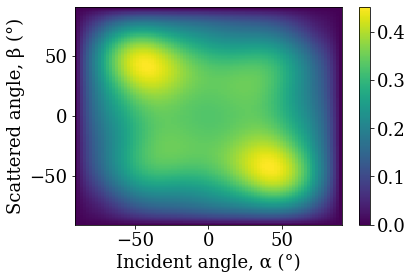

In [13]:
# Jie's python script
sc_5mhz = f1['sc_2_5mhz']
phi1 = f1['phi1']
phi2 = f1['phi2']

tmp = sc_5mhz[15,5,:,:] # python index starts from 0


font = {'family' : 'serif',
'weight' : 'normal',
'size' : 18}

plt.rc('font', **font) 
fig, ax = plt.subplots()
c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(tmp), shading='auto') 
ax.set_xlabel('Incident angle, \u03B1 (\xb0)')
ax.set_ylabel('Scattered angle, \u03B2 (\xb0)')
fig.colorbar(c, ax=ax)
plt.show()

## 2.2. Single Scattering Matrix

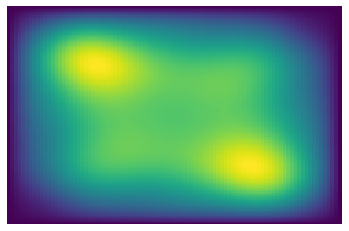

In [14]:
sc_5mhz = f1['sc_2_5mhz']
phi1 = f1['phi1']
phi2 = f1['phi2']

tmp = sc_5mhz[15,5,:,:] # python index starts from 0

fig, ax = plt.subplots()
c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(tmp), shading='auto') 

# saving the content of the plot
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.axis('off')
plt.savefig('D:\\15_5_2_5MHz.png', bbox_inches = 'tight',pad_inches = 0)

## 2.3. Scattering Matrices for all 46 defect sizes for a single angle: -30°

In [15]:
a_1 = f1['sc_2_5mhz'][0] # angle : -30 degrees

In [16]:
a_1_1 = a_1[0]
abs_a_1 = abs(a_1_1)
abs_a_1

array([[5.56022618e-33, 3.57232353e-18, 6.75560730e-18, ...,
        4.18864482e-18, 2.22068419e-18, 2.36617553e-33],
       [1.73079896e-18, 1.67385325e-03, 3.16268362e-03, ...,
        2.93647606e-03, 1.55309810e-03, 4.26111112e-19],
       [3.41483888e-18, 3.30216393e-03, 6.23931105e-03, ...,
        5.79225773e-03, 3.06351495e-03, 8.40489603e-19],
       ...,
       [1.80239962e-18, 3.03510364e-03, 5.73074617e-03, ...,
        7.53694978e-03, 3.98184308e-03, 1.59850039e-18],
       [9.14178887e-19, 1.53830450e-03, 2.90455555e-03, ...,
        3.81909680e-03, 2.01766890e-03, 8.08933788e-19],
       [1.73877668e-33, 9.94346526e-19, 1.88188057e-18, ...,
        4.28171409e-18, 2.25367661e-18, 2.22262744e-33]])

In [17]:
data = a_1                 

outpath = r'D:\\a_1'

phi1 = f1['phi1']
phi2 = f1['phi2']
sizes = ['0.0005', '0.0006', '0.0007', '0.0008', '0.0009', '0.001', '0.0011', '0.0012', '0.0013', '0.0014', '0.0015', '0.0016', '0.0017', '0.0018', '0.0019', '0.002', '0.0021', '0.0022', '0.0023', '0.0024', '0.0025', '0.0026', '0.0027', '0.0028', '0.0029', '0.003', '0.0031', '0.0032', '0.0033', '0.0034', '0.0035', '0.0036', '0.0037', '0.0038', '0.0039', '0.004', '0.0041', '0.0042', '0.0043', '0.0044', '0.0045', '0.0046', '0.0047', '0.0048', '0.0049', '0.005']

# saving the content of all the plots of angle: -30°
for i,j in zip(data, sizes):
    fig, ax = plt.subplots()
    c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(i), shading = 'auto')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.axis('off') 
    plt.savefig(path.join(outpath,"defect_size_{}.png".format(j)), bbox_inches = 'tight',pad_inches = 0)
    plt.close()

- understanding the code:

In [18]:
(phi1[:,0]/np.pi*180).shape

(91,)

In [19]:
(phi2[:,0]/np.pi*180).shape

(179,)

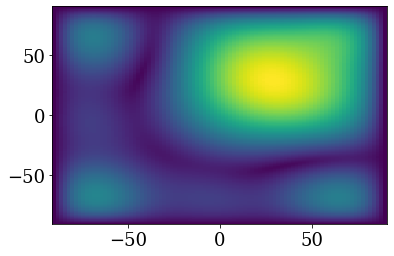

In [20]:
plt.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(data[0]), shading = 'auto')

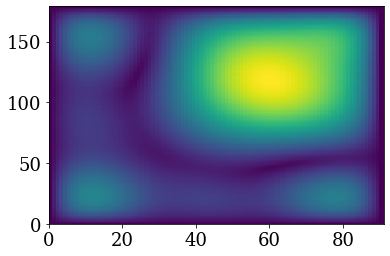

In [21]:
plt.pcolor(abs(data[0]), shading = 'auto')

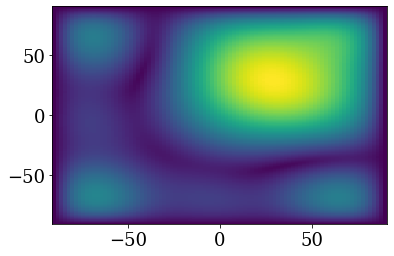

In [22]:
z = plt.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(data[0]), shading = 'auto')

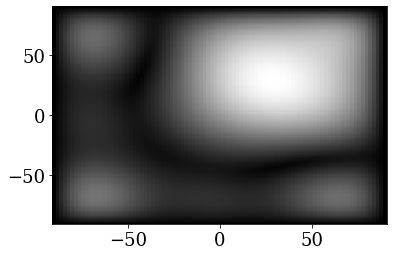

In [23]:
z = plt.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(data[0]), shading = 'auto', cmap = plt.get_cmap('gray'))

- more features is better

In [24]:
z.get_figure().canvas

In [25]:
z.get_figure().canvas.get_width_height()

(432, 288)

In [26]:
len(z.get_figure().canvas.tostring_argb()) #bytes data of the current image

403456

In [27]:
(len(z.get_figure().canvas.tostring_argb())*8)//10**6

3

- converting to float will be almost 8 times the above size (estimation)
- each image might take max of 2mb data
- 1426 images
- 1426*2 = 3gb RAM required

## 2.4. Scattering Matrices for all defect sizes and angles

In [28]:
sm_2_5MHz = f1['sc_2_5mhz']

In [29]:
sm_2_5MHz.shape

(31, 46, 179, 91)

In [30]:
len(sm_2_5MHz)

31

In [31]:
angles = ['-30', '-28', '-26', '-24', '-22', '-20', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28', '30']

In [32]:
len(angles)

31

### 2.4.1. Grayscale

In [33]:
# creating folders for each angle
root_path = 'D:\\Grayscale\\2_5_MHz'
  
for i in angles:
    path = os.path.join(root_path, i)
    os.mkdir(path)

In [34]:
# function to save all plots for a single angle
def save_angle(data, outpath):
    phi1 = f1['phi1']
    phi2 = f1['phi2']
    sizes = ['0.0005', '0.0006', '0.0007', '0.0008', '0.0009', '0.001', '0.0011', '0.0012', '0.0013', '0.0014', '0.0015', '0.0016', '0.0017', '0.0018', '0.0019', '0.002', '0.0021', '0.0022', '0.0023', '0.0024', '0.0025', '0.0026', '0.0027', '0.0028', '0.0029', '0.003', '0.0031', '0.0032', '0.0033', '0.0034', '0.0035', '0.0036', '0.0037', '0.0038', '0.0039', '0.004', '0.0041', '0.0042', '0.0043', '0.0044', '0.0045', '0.0046', '0.0047', '0.0048', '0.0049', '0.005']

    for i,j in zip(data, sizes):
        fig, ax = plt.subplots()
        c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(i), shading = 'auto', cmap = plt.get_cmap('gray'))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.axis('off') 
        plt.savefig(outpath+"\\defect_size_{}.png".format(j), bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [35]:
# using the save_angle() function to save all plots for all angles
for i, outpath in enumerate(list(sorted(os.listdir('D:\\Grayscale\\2_5_MHz'), key = int))):
    print('saving images for angle', outpath)
    save_angle(f1['sc_2_5mhz'][i],'D:\\Grayscale\\2_5_MHz\\'+outpath)

saving images for angle -30
saving images for angle -28
saving images for angle -26
saving images for angle -24
saving images for angle -22
saving images for angle -20
saving images for angle -18
saving images for angle -16
saving images for angle -14
saving images for angle -12
saving images for angle -10
saving images for angle -8
saving images for angle -6
saving images for angle -4
saving images for angle -2
saving images for angle 0
saving images for angle 2
saving images for angle 4
saving images for angle 6
saving images for angle 8
saving images for angle 10
saving images for angle 12
saving images for angle 14
saving images for angle 16
saving images for angle 18
saving images for angle 20
saving images for angle 22
saving images for angle 24
saving images for angle 26
saving images for angle 28
saving images for angle 30


### 2.4.2. Colour

In [36]:
# creating folders for each angle
root_path = 'D:\\Colour\\2_5_MHz'
  
for i in angles:
    path = os.path.join(root_path, i)
    os.mkdir(path)

In [37]:
# function to save all plots for a single angle
def save_angle_colour(data, outpath):
    phi1 = f1['phi1']
    phi2 = f1['phi2']
    sizes = ['0.0005', '0.0006', '0.0007', '0.0008', '0.0009', '0.001', '0.0011', '0.0012', '0.0013', '0.0014', '0.0015', '0.0016', '0.0017', '0.0018', '0.0019', '0.002', '0.0021', '0.0022', '0.0023', '0.0024', '0.0025', '0.0026', '0.0027', '0.0028', '0.0029', '0.003', '0.0031', '0.0032', '0.0033', '0.0034', '0.0035', '0.0036', '0.0037', '0.0038', '0.0039', '0.004', '0.0041', '0.0042', '0.0043', '0.0044', '0.0045', '0.0046', '0.0047', '0.0048', '0.0049', '0.005']

    for i,j in zip(data, sizes):
        fig, ax = plt.subplots()
        c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(i), shading = 'auto')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.axis('off') 
        plt.savefig(outpath+"\\defect_size_{}.png".format(j), bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [38]:
# using the save_angle_colour() function to save all plots for all angles
for i, outpath in enumerate(list(sorted(os.listdir('D:\\Colour\\2_5_MHz'), key = int))):
    print('saving images for angle', outpath)
    save_angle_colour(f1['sc_2_5mhz'][i],'D:\\Colour\\2_5_MHz\\'+outpath)

saving images for angle -30
saving images for angle -28
saving images for angle -26
saving images for angle -24
saving images for angle -22
saving images for angle -20
saving images for angle -18
saving images for angle -16
saving images for angle -14
saving images for angle -12
saving images for angle -10
saving images for angle -8
saving images for angle -6
saving images for angle -4
saving images for angle -2
saving images for angle 0
saving images for angle 2
saving images for angle 4
saving images for angle 6
saving images for angle 8
saving images for angle 10
saving images for angle 12
saving images for angle 14
saving images for angle 16
saving images for angle 18
saving images for angle 20
saving images for angle 22
saving images for angle 24
saving images for angle 26
saving images for angle 28
saving images for angle 30


---

# 3. Data : 5Mhz

In [39]:
# loading the data
f2 = scipy.io.loadmat("C:\\Users\\revon\\OneDrive - University of Bristol\\summer project\\july_read_data\\Sm_5MHz.mat")

In [40]:
f2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jul 19 12:59:08 2022',
 '__version__': '1.0',
 '__globals__': [],
 'angle_a': array([[-30, -28, -26, -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,
          -4,  -2,   0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,
          22,  24,  26,  28,  30]], dtype=int16),
 'phi1': array([[-1.57079633],
        [-1.53588974],
        [-1.50098316],
        [-1.46607657],
        [-1.43116999],
        [-1.3962634 ],
        [-1.36135682],
        [-1.32645023],
        [-1.29154365],
        [-1.25663706],
        [-1.22173048],
        [-1.18682389],
        [-1.15191731],
        [-1.11701072],
        [-1.08210414],
        [-1.04719755],
        [-1.01229097],
        [-0.97738438],
        [-0.9424778 ],
        [-0.90757121],
        [-0.87266463],
        [-0.83775804],
        [-0.80285146],
        [-0.76794487],
        [-0.73303829],
        [-0.6981317 ],
        [-0.66322512],
        [-0.62831853],


In [41]:
f2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'angle_a', 'phi1', 'phi2', 'sc_5mhz', 'size_ha'])

- angle_a: angle, θ = [-30°:2°:30°]
- phi1: wave incident angles, α [-90°,90°]
- phi2: wave scattering angles, β [-90°,90°]
- sc_5mhz: [defect angle, defect size, wave incident angles, wave scattered angles], 31 x 46 x 179 x 91
- size_ha: defect size, l, [0.5:0.1:5] mm

In [42]:
print('S-matrix shape: {}'.format(np.shape(f2['sc_5mhz'])))
print('Defect Angle (\u03F4) shape: {}'.format(np.shape(f2['angle_a'])))
print('Defect Size (l) shape: {}'.format(np.shape(f2['size_ha'])))
print('Wave Incident Angle (\u03B1) shape: {}'.format(np.shape(f2['phi1'])))
print('Wave Scattering Angle (\u03B2) shape: {}'.format(np.shape(f2['phi2'])))

S-matrix shape: (31, 46, 179, 91)
Defect Angle (ϴ) shape: (1, 31)
Defect Size (l) shape: (1, 46)
Wave Incident Angle (α) shape: (91, 1)
Wave Scattering Angle (β) shape: (179, 1)


## 3.1. Scattering Matrix

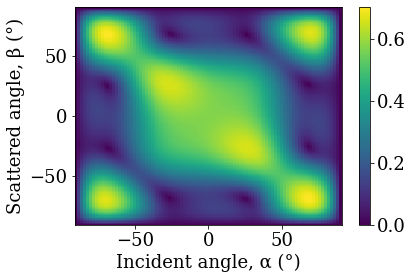

In [43]:
# Jie's python script
sc_5mhz = f2['sc_5mhz']
phi1 = f2['phi1']
phi2 = f2['phi2']

tmp = sc_5mhz[15,5,:,:] # python index starts from 0


font = {'family' : 'serif',
'weight' : 'normal',
'size' : 18}

plt.rc('font', **font) 
fig, ax = plt.subplots()
c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(tmp), shading='auto') 
ax.set_xlabel('Incident angle, \u03B1 (\xb0)')
ax.set_ylabel('Scattered angle, \u03B2 (\xb0)')
fig.colorbar(c, ax=ax)
plt.show()

## 3.2. Single Scattering Matrix

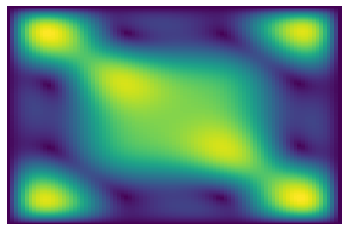

In [44]:
sc_5mhz = f2['sc_5mhz']
phi1 = f2['phi1']
phi2 = f2['phi2']

tmp = sc_5mhz[15,5,:,:] # python index starts from 0

fig, ax = plt.subplots()
c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(tmp), shading='auto') 

# saving the content of the plot
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.axis('off')
plt.savefig('D:\\15_5_5MHz.png', bbox_inches = 'tight',pad_inches = 0)

## 3.3. Scattering Matrices for all defect sizes and angles

In [45]:
sm_5MHz = f2['sc_5mhz']

In [46]:
sm_5MHz.shape

(31, 46, 179, 91)

In [47]:
len(sm_5MHz)

31

In [48]:
angles = ['-30', '-28', '-26', '-24', '-22', '-20', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28', '30']

In [49]:
len(angles)

31

### 3.3.1. Grayscale

In [50]:
# creating folders for each angle
root_path = 'D:\\Grayscale\\5_MHz'
  
for i in angles:
    path = os.path.join(root_path, i)
    os.mkdir(path)

In [51]:
# function to save all plots for a single angle
def save_angle(data, outpath):
    phi1 = f2['phi1']
    phi2 = f2['phi2']
    sizes = ['0.0005', '0.0006', '0.0007', '0.0008', '0.0009', '0.001', '0.0011', '0.0012', '0.0013', '0.0014', '0.0015', '0.0016', '0.0017', '0.0018', '0.0019', '0.002', '0.0021', '0.0022', '0.0023', '0.0024', '0.0025', '0.0026', '0.0027', '0.0028', '0.0029', '0.003', '0.0031', '0.0032', '0.0033', '0.0034', '0.0035', '0.0036', '0.0037', '0.0038', '0.0039', '0.004', '0.0041', '0.0042', '0.0043', '0.0044', '0.0045', '0.0046', '0.0047', '0.0048', '0.0049', '0.005']

    for i,j in zip(data, sizes):
        fig, ax = plt.subplots()
        c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(i), shading = 'auto', cmap = plt.get_cmap('gray'))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.axis('off') 
        plt.savefig(outpath+"\\defect_size_{}.png".format(j), bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [52]:
# using the save_angle() function to save all plots for all angles
for i, outpath in enumerate(list(sorted(os.listdir('D:\\Grayscale\\5_MHz'), key = int))):
    print('saving images for angle', outpath)
    save_angle(f2['sc_5mhz'][i],'D:\\Grayscale\\5_MHz\\'+outpath)

saving images for angle -30
saving images for angle -28
saving images for angle -26
saving images for angle -24
saving images for angle -22
saving images for angle -20
saving images for angle -18
saving images for angle -16
saving images for angle -14
saving images for angle -12
saving images for angle -10
saving images for angle -8
saving images for angle -6
saving images for angle -4
saving images for angle -2
saving images for angle 0
saving images for angle 2
saving images for angle 4
saving images for angle 6
saving images for angle 8
saving images for angle 10
saving images for angle 12
saving images for angle 14
saving images for angle 16
saving images for angle 18
saving images for angle 20
saving images for angle 22
saving images for angle 24
saving images for angle 26
saving images for angle 28
saving images for angle 30


### 3.3.2. Colour

In [53]:
# creating folders for each angle
root_path = 'D:\\Colour\\5_MHz'
  
for i in angles:
    path = os.path.join(root_path, i)
    os.mkdir(path)

In [54]:
# function to save all plots for a single angle
def save_angle_colour(data, outpath):
    phi1 = f2['phi1']
    phi2 = f2['phi2']
    sizes = ['0.0005', '0.0006', '0.0007', '0.0008', '0.0009', '0.001', '0.0011', '0.0012', '0.0013', '0.0014', '0.0015', '0.0016', '0.0017', '0.0018', '0.0019', '0.002', '0.0021', '0.0022', '0.0023', '0.0024', '0.0025', '0.0026', '0.0027', '0.0028', '0.0029', '0.003', '0.0031', '0.0032', '0.0033', '0.0034', '0.0035', '0.0036', '0.0037', '0.0038', '0.0039', '0.004', '0.0041', '0.0042', '0.0043', '0.0044', '0.0045', '0.0046', '0.0047', '0.0048', '0.0049', '0.005']

    for i,j in zip(data, sizes):
        fig, ax = plt.subplots()
        c = ax.pcolor(phi1[:,0]/np.pi*180, phi2[:,0]/np.pi*180, abs(i), shading = 'auto')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.axis('off') 
        plt.savefig(outpath+"\\defect_size_{}.png".format(j), bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [55]:
# using the save_angle_colour() function to save all plots for all angles
for i, outpath in enumerate(list(sorted(os.listdir('D:\\Colour\\5_MHz'), key = int))):
    print('saving images for angle', outpath)
    save_angle_colour(f2['sc_5mhz'][i],'D:\\Colour\\5_MHz\\'+outpath)

saving images for angle -30
saving images for angle -28
saving images for angle -26
saving images for angle -24
saving images for angle -22
saving images for angle -20
saving images for angle -18
saving images for angle -16
saving images for angle -14
saving images for angle -12
saving images for angle -10
saving images for angle -8
saving images for angle -6
saving images for angle -4
saving images for angle -2
saving images for angle 0
saving images for angle 2
saving images for angle 4
saving images for angle 6
saving images for angle 8
saving images for angle 10
saving images for angle 12
saving images for angle 14
saving images for angle 16
saving images for angle 18
saving images for angle 20
saving images for angle 22
saving images for angle 24
saving images for angle 26
saving images for angle 28
saving images for angle 30


---

# 4. Experimental Data: 2.5 Mhz

- There are 4 data files, one of which contain 5-6 experimentally measured sub-array S-matrices (8 elements in each subarray) at 2.5 MHz. All defects are vertical surface breaking cracks i.e.,  **θ≈0°**
- actual_size: actual defect size (6)
- angi: wave incident angle (degree, 56 x 56)
- angs: wave scattered angle (degree, 56 x 56)
- S_exp_a: experimentally measured S-matrix, (6 x 56 x 56)

In [56]:
exp_files = ['8','10','13','14']

In [57]:
root_path = 'D:\\Grayscale\\2_5_MHz_exp'
  
for i in exp_files:
    path = os.path.join(root_path, i)
    os.mkdir(path)

## 4.1. File 1 : B8

In [58]:
# loading the data
b8 = scipy.io.loadmat("C:\\Users\\revon\\OneDrive - University of Bristol\\summer project\\exp_data\\exp_S_matrix_SENB8.mat")

In [59]:
b8

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug  9 14:24:22 2022',
 '__version__': '1.0',
 '__globals__': [],
 'S_exp_a': array([[[0.62494333, 0.69660971, 0.73743741, ..., 0.47661716,
          0.48962416, 0.54265437],
         [0.68908727, 0.81573974, 0.88087333, ..., 0.41437968,
          0.4418801 , 0.53910463],
         [0.72239032, 0.87205641, 0.94740965, ..., 0.39787484,
          0.43004612, 0.54440881],
         ...,
         [0.48195144, 0.42281429, 0.40898377, ..., 0.70056518,
          0.65894254, 0.57727863],
         [0.49736253, 0.45423953, 0.4460428 , ..., 0.65902339,
          0.62735448, 0.56719711],
         [0.54851626, 0.55130212, 0.56205463, ..., 0.57532262,
          0.56434763, 0.55424067]],
 
        [[0.65371402, 0.72030303, 0.75783489, ..., 0.51802248,
          0.53001612, 0.5781232 ],
         [0.70660009, 0.82324805, 0.88307791, ..., 0.45357639,
          0.4792423 , 0.56890445],
         [0.73308147, 0.86993362, 0.93770672, ...

In [60]:
b8['actual_size']

array([[4.6, 4.1, 3.6, 3. , 2.5, 2.2, 1.6]])

In [61]:
print('S-matrix shape: {}'.format(np.shape(b8['S_exp_a'])))
print('Defect Size (l) shape: {}'.format(np.shape(b8['actual_size'])))
print('Wave Incident Angle (\u03B1) shape: {}'.format(np.shape(b8['angi'])))
print('Wave Scattering Angle (\u03B2) shape: {}'.format(np.shape(b8['angs'])))

S-matrix shape: (7, 56, 56)
Defect Size (l) shape: (1, 7)
Wave Incident Angle (α) shape: (56, 56)
Wave Scattering Angle (β) shape: (56, 56)


### 4.1.1. Scattering Matrix

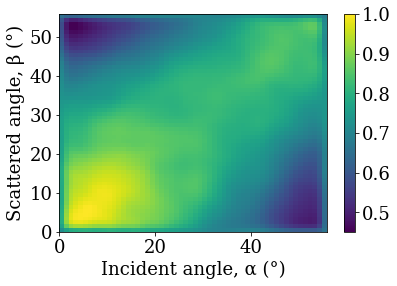

In [62]:
# Jie's python script
sc_exp_b8 = b8['S_exp_a']

tmp = sc_exp_b8[2,:,:] # python index starts from 0


font = {'family' : 'serif',
'weight' : 'normal',
'size' : 18}

plt.rc('font', **font) 
fig, ax = plt.subplots()
c = ax.pcolor(abs(tmp), shading='auto') 
ax.set_xlabel('Incident angle, \u03B1 (\xb0)')
ax.set_ylabel('Scattered angle, \u03B2 (\xb0)')
fig.colorbar(c, ax=ax)
plt.show()

### 4.1.2. Single Scattering Matrix

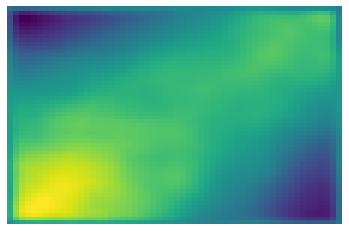

In [63]:
sc_exp_b8 = b8['S_exp_a']

tmp = sc_exp_b8[2,:,:] # python index starts from 0

fig, ax = plt.subplots()
c = ax.pcolor(abs(tmp), shading='auto') 

# saving the content of the plot
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.axis('off')
plt.savefig('D:\\exp.png', bbox_inches = 'tight',pad_inches = 0)

### 4.1.3. Scattering Matrices for all defect sizes

In [64]:
angles = ['0']

In [65]:
root_path = 'D:\\Grayscale\\2_5_MHz_exp\\8'
  
for i in angles:
    path = os.path.join(root_path, i)
    os.mkdir(path)

In [66]:
def save_angle(data, outpath):
    sizes = ['4.6', '4.1', '3.6', '3.', '2.5', '2.2', '1.6']

    for i,j in zip(data, sizes):
        fig, ax = plt.subplots()
        c = ax.pcolor(abs(i), shading = 'auto', cmap = plt.get_cmap('gray'))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.axis('off') 
        plt.savefig(outpath+"\\defect_size_{}.png".format(j), bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [67]:
# using the save_angle() function to save all plots for all angles
for i, outpath in enumerate(list(sorted(os.listdir('D:\\Grayscale\\2_5_MHz_exp\\8'), key = int))):
    print('saving images for angle', outpath)
    save_angle(b8['S_exp_a'],'D:\\Grayscale\\2_5_MHz_exp\\8\\'+outpath)

saving images for angle 0


## 4.2. File 2 : B10

In [68]:
# loading the data
b10 = scipy.io.loadmat("C:\\Users\\revon\\OneDrive - University of Bristol\\summer project\\exp_data\\exp_S_matrix_SENB10.mat")

In [69]:
b10['actual_size']

array([[4.7, 3.7, 3.2, 2.2, 2. , 1.7]])

In [70]:
print('S-matrix shape: {}'.format(np.shape(b10['S_exp_a'])))
print('Defect Size (l) shape: {}'.format(np.shape(b10['actual_size'])))
print('Wave Incident Angle (\u03B1) shape: {}'.format(np.shape(b10['angi'])))
print('Wave Scattering Angle (\u03B2) shape: {}'.format(np.shape(b10['angs'])))

S-matrix shape: (6, 56, 56)
Defect Size (l) shape: (1, 6)
Wave Incident Angle (α) shape: (56, 56)
Wave Scattering Angle (β) shape: (56, 56)


### 4.2.1. Scattering Matrices for all defect sizes

In [71]:
angles = ['0']

In [72]:
root_path = 'D:\\Grayscale\\2_5_MHz_exp\\10'
  
for i in angles:
    path = os.path.join(root_path, i)
    os.mkdir(path)

In [73]:
def save_angle(data, outpath):
    sizes = ['4.7', '3.7', '3.2', '2.2', '2.', '1.7']

    for i,j in zip(data, sizes):
        fig, ax = plt.subplots()
        c = ax.pcolor(abs(i), shading = 'auto', cmap = plt.get_cmap('gray'))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.axis('off') 
        plt.savefig(outpath+"\\defect_size_{}.png".format(j), bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [74]:
# using the save_angle() function to save all plots for all angles
for i, outpath in enumerate(list(sorted(os.listdir('D:\\Grayscale\\2_5_MHz_exp\\10'), key = int))):
    print('saving images for angle', outpath)
    save_angle(b10['S_exp_a'],'D:\\Grayscale\\2_5_MHz_exp\\10\\'+outpath)

saving images for angle 0


## 4.3. File 3 : B13

In [75]:
# loading the data
b13 = scipy.io.loadmat("C:\\Users\\revon\\OneDrive - University of Bristol\\summer project\\exp_data\\exp_S_matrix_SENB13.mat")

In [76]:
b13['actual_size']

array([[4.5, 4. , 3.5, 3. , 2.5, 2. ]])

In [77]:
print('S-matrix shape: {}'.format(np.shape(b13['S_exp_a'])))
print('Defect Size (l) shape: {}'.format(np.shape(b13['actual_size'])))
print('Wave Incident Angle (\u03B1) shape: {}'.format(np.shape(b13['angi'])))
print('Wave Scattering Angle (\u03B2) shape: {}'.format(np.shape(b13['angs'])))

S-matrix shape: (6, 56, 56)
Defect Size (l) shape: (1, 6)
Wave Incident Angle (α) shape: (56, 56)
Wave Scattering Angle (β) shape: (56, 56)


### 4.3.1. Scattering Matrices for all defect sizes

In [78]:
angles = ['0']

In [79]:
root_path = 'D:\\Grayscale\\2_5_MHz_exp\\13'
  
for i in angles:
    path = os.path.join(root_path, i)
    os.mkdir(path)

In [80]:
def save_angle(data, outpath):
    sizes = ['4.5', '4.', '3.5', '3.', '2.5', '2.']

    for i,j in zip(data, sizes):
        fig, ax = plt.subplots()
        c = ax.pcolor(abs(i), shading = 'auto', cmap = plt.get_cmap('gray'))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.axis('off') 
        plt.savefig(outpath+"\\defect_size_{}.png".format(j), bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [81]:
# using the save_angle() function to save all plots for all angles
for i, outpath in enumerate(list(sorted(os.listdir('D:\\Grayscale\\2_5_MHz_exp\\13'), key = int))):
    print('saving images for angle', outpath)
    save_angle(b13['S_exp_a'],'D:\\Grayscale\\2_5_MHz_exp\\13\\'+outpath)

saving images for angle 0


## 4.4. File 4 : B14

In [82]:
# loading the data
b14 = scipy.io.loadmat("C:\\Users\\revon\\OneDrive - University of Bristol\\summer project\\exp_data\\exp_S_matrix_SENB14.mat")

In [83]:
b14['actual_size']

array([[4.8, 4. , 3.6, 3.1, 2.6, 2.1]])

In [84]:
print('S-matrix shape: {}'.format(np.shape(b14['S_exp_a'])))
print('Defect Size (l) shape: {}'.format(np.shape(b14['actual_size'])))
print('Wave Incident Angle (\u03B1) shape: {}'.format(np.shape(b14['angi'])))
print('Wave Scattering Angle (\u03B2) shape: {}'.format(np.shape(b14['angs'])))

S-matrix shape: (6, 56, 56)
Defect Size (l) shape: (1, 6)
Wave Incident Angle (α) shape: (56, 56)
Wave Scattering Angle (β) shape: (56, 56)


### 4.4.1. Scattering Matrices for all defect sizes

In [85]:
angles = ['0']

In [86]:
root_path = 'D:\\Grayscale\\2_5_MHz_exp\\14'
  
for i in angles:
    path = os.path.join(root_path, i)
    os.mkdir(path)

In [87]:
def save_angle(data, outpath):
    sizes = ['4.8', '4.', '3.6', '3.1', '2.6', '2.1']

    for i,j in zip(data, sizes):
        fig, ax = plt.subplots()
        c = ax.pcolor(abs(i), shading = 'auto', cmap = plt.get_cmap('gray'))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.axis('off') 
        plt.savefig(outpath+"\\defect_size_{}.png".format(j), bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [88]:
# using the save_angle() function to save all plots for all angles
for i, outpath in enumerate(list(sorted(os.listdir('D:\\Grayscale\\2_5_MHz_exp\\14'), key = int))):
    print('saving images for angle', outpath)
    save_angle(b14['S_exp_a'],'D:\\Grayscale\\2_5_MHz_exp\\14\\'+outpath)

saving images for angle 0


---

# 5. Additional - Reading an image using Pillow

In [92]:
# png
Img = Image.open("D:\\15_5_2_5MHz.png") # Opening Image as an object
print("Filename :", Img.filename) # Getting the filename of image
print("Format :", Img.format) # Getting the format of image
print("Mode :", Img.mode) # Getting the mode of image
print("Size :", Img.size) # Getting the size of image
print("Shape :", np.array(Img).shape)
print("Shape (Grayscale) :", np.array(Img.convert("L")).shape)
print("Width : ", Img.width) # Getting only the width of image
print("Height : ", Img.height) # Getting only the height of image
print("Image Palette : ", Img.palette) # Getting the color palette of image
print("Image Info : ", Img.info) # Getting the info about image
print("Array Info : ", np.asarray(Img)) # Array information
Img.close() # Closing Image object
#Img.convert("L").show()

Filename : D:\15_5_2_5MHz.png
Format : PNG
Mode : RGBA
Size : (334, 217)
Shape : (217, 334, 4)
Shape (Grayscale) : (217, 334)
Width :  334
Height :  217
Image Palette :  None
Image Info :  {'Software': 'Matplotlib version3.5.2, https://matplotlib.org/', 'dpi': (72.009, 72.009)}
Array Info :  [[[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 ...

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
 

In [ ]:
# tiff
Img = Image.open("D:\\16_16.tiff") # Opening Image as an object
print("Filename :", Img.filename) # Getting the filename of image
print("Format :", Img.format) # Getting the format of image
print("Mode :", Img.mode) # Getting the mode of image
print("Size :", Img.size) # Getting the size of image
print("Shape :", np.array(Img).shape)
print("Shape (Grayscale) :", np.array(Img.convert("L")).shape)
print("Width : ", Img.width) # Getting only the width of image
print("Height : ", Img.height) # Getting only the height of image
print("Image Palette : ", Img.palette) # Getting the color palette of image
print("Image Info : ", Img.info) # Getting the info about image
print("Array Info : ", np.asarray(Img)) # Array information
Img.close() # Closing Image object
#Img.convert("L").show()